# Lab 5

Group members:
* Alex Balazs
* Kate Bouis
* Susan Bataju

## Preparation

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
import matplotlib
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
# %matplotlib inline
pd.set_option('display.max_columns', 40)
df = pd.read_csv('BankChurners.csv')
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1) # let's drop id from the start
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [71]:
# Checking for missing data 
df.isna().sum()
# No empty data fields

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [72]:
# Check for duplicated values

duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [74]:
draw_again = False
if draw_again:
    plt.figure(figsize=(40,40))
    for i,c in enumerate(df.columns):
        plt.subplot(4,6,i+1)
        df[c].hist()
        plt.title(c)
    plt.show()

In [75]:
if draw_again:

    categorical_headers = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
    numeric_headers = [i for i in df.columns if i not in categorical_headers]
    plt.figure(figsize=(15, 15))
    corr=df[numeric_headers].corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True,annot=True)
    plt.show()

We should drop either credit_limit or Avg_Open_To_Buy as  they represent same distrubitions 

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

categorical_headers = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
numeric_headers = [i for i in df.columns if i not in categorical_headers]

encoders = dict()
tmp = LabelEncoder()
df['Attrition_Flag'+'_int'] = tmp.fit_transform(df['Attrition_Flag'])
for col in categorical_headers:
    encoders[col] = LabelEncoder() 
    df[col+'_int'] = encoders[col].fit_transform(df[col])
    

In [82]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_int,Gender_int,Education_Level_int,Marital_Status_int,Income_Category_int,Card_Category_int
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,3,1,2,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,2,2,4,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,2,1,3,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,3,3,4,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,1,2,2,1,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1,6,0,1,0
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,3,1,4,0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,1,2,3,1,0


In [78]:
categorical_headers_ints = [x+'_int' for x in categorical_headers]


In [86]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras

embed_branches = []
all_branch_outputs = [] # this is where we will keep track of output of each branch

# feed in the entire matrix of categircal variables
input_branch = Input(shape=(len(categorical_headers_ints),), 
                     dtype='int64', 
                     name='categorical')
for idx,col in enumerate(categorical_headers_ints):
    # if 'Attrition_Flag_int' in col: continue #skip the target
    N = len(encoders[categorical_headers[idx]].classes_)
    print(col,N)

    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_branch, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs in list to concatenate later
    all_branch_outputs.append(x)

# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,
                     activation='sigmoid', 
                     name='combined')(final_branch)

model = Model(inputs=input_branch, outputs=final_branch)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()
            

Gender_int 2
Education_Level_int 7
Marital_Status_int 4
Income_Category_int 6
Card_Category_int 4
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 categorical (InputLayer)       [(None, 5)]          0           []                               
                                                                                                  
 tf.compat.v1.gather_20 (TFOpLa  (None,)             0           ['categorical[0][0]']            
 mbda)                                                                                            
                                                                                                  
 tf.compat.v1.gather_21 (TFOpLa  (None,)             0           ['categorical[0][0]']            
 mbda)                                                                                       

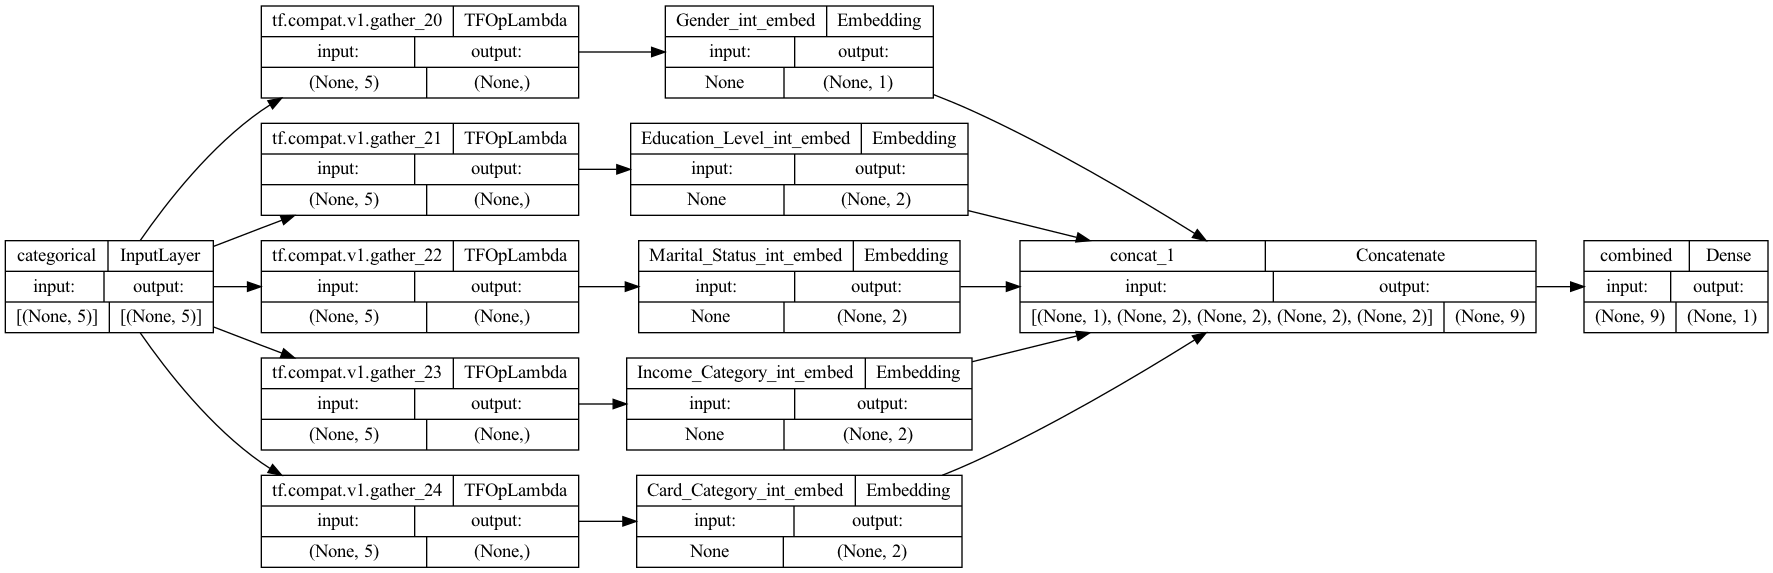

In [87]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


In [88]:
cat_df = df[categorical_headers_ints]
cat_y = df['Attrition_Flag_int']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cat_df , cat_y , test_size=0.20, random_state=42,stratify=cat_y)

In [91]:
%%time

model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=10, batch_size=50, verbose=1)

from sklearn import metrics as mt
yhat_proba = model.predict(X_test.to_numpy())
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test.to_numpy(),yhat))
print(mt.classification_report(y_test.to_numpy(),yhat))

Epoch 1/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.8393
Epoch 2/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.8393
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.8393
Epoch 4/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.8393
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.8393
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.8393
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.8393
Epoch 8/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.8393
Epoch 9/10
163/163 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.8393
Epoch 10/10
64/64 [==============================] - 0s 1ms/step
[[   0  325]
 [   0 1701]]
        

/Users/48391139/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/48391139/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/48391139/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# Removing NB Classifiers
# df.drop(df.iloc[:, -2:], inplace = True, axis = 1)

# Labeling target variable (attrition)... 1 = not attrited, 0 = attrited
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer": 1, "Attrited Customer": 0})

# Label encoding gender... Male = 0, Female = 1
df["Gender"] = df["Gender"].map({"M":0, "F":1})

# Cleaning and ordinalizing income category data
from sklearn.preprocessing import LabelEncoder

inc_labels = LabelEncoder()
df["Income_Labels"] = inc_labels.fit_transform(df["Income_Category"])
df.drop(["Income_Category"], inplace = True, axis = 1)

# Ordinalizing marital status
df["Marital_Status"] = df["Marital_Status"].map({"Unknown":0, "Single":1, "Married":2, "Divorced":3})

In [6]:
df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [7]:
df["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [8]:
# drop clientnum column
df.drop('CLIENTNUM', axis=1, inplace=True)

In [9]:
# one hot encoding card category and education
one_hot = pd.get_dummies(df['Card_Category'])
df = df.drop('Card_Category',axis = 1)
# Join the encoded df
df = df.join(one_hot)


one_hot = pd.get_dummies(df['Education_Level'])
df = df.drop('Education_Level',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [10]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Gold,Platinum,Silver,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,0,45,0,3,2,39,5,1,3,12691.0,...,0,0,0,0,0,0,1,0,0,0
1,0,49,1,5,1,44,6,1,2,8256.0,...,0,0,0,0,0,1,0,0,0,0
2,0,51,0,3,2,36,4,1,0,3418.0,...,0,0,0,0,0,1,0,0,0,0
3,0,40,1,4,0,34,3,4,1,3313.0,...,0,0,0,0,0,0,1,0,0,0
4,0,40,0,3,2,21,5,1,0,4716.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,1,40,3,2,3,4003.0,...,0,0,0,0,0,1,0,0,0,0
10123,1,41,0,2,3,25,4,2,3,4277.0,...,0,0,0,0,0,0,0,0,0,1
10124,1,44,1,1,2,36,5,3,4,5409.0,...,0,0,0,0,0,0,1,0,0,0
10125,1,30,0,2,0,36,4,3,3,5281.0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# normalize data using mean normalization 
normalized_df=(df-df.min())/(df.max()-df.min())

normalized_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Gold,Platinum,Silver,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,0.0,0.404255,0.0,0.6,0.666667,0.604651,0.8,0.166667,0.500000,0.340190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.489362,1.0,1.0,0.333333,0.720930,1.0,0.166667,0.333333,0.206112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.531915,0.0,0.6,0.666667,0.534884,0.6,0.166667,0.000000,0.059850,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.297872,1.0,0.8,0.000000,0.488372,0.4,0.666667,0.166667,0.056676,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.297872,0.0,0.6,0.666667,0.186047,0.8,0.166667,0.000000,0.099091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.510638,0.0,0.4,0.333333,0.627907,0.4,0.333333,0.500000,0.077536,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10123,1.0,0.319149,0.0,0.4,1.000000,0.279070,0.6,0.333333,0.500000,0.085819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10124,1.0,0.382979,1.0,0.2,0.666667,0.534884,0.8,0.500000,0.666667,0.120042,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10125,1.0,0.085106,0.0,0.4,0.000000,0.534884,0.6,0.500000,0.500000,0.116172,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


To give a little background, the goal of our dataset is to predict which customers are close to leaving their credit card services. The purpose of our prediction task is to reach out to those identified customers to prevent them from cancelling their credit card. The dataset has 10.1k unique data samples, and the column 'Attrition_Flag' serves as our target. 'Attrition_Flag' is classified binarily with the values 'Existing Customer' and 'Attrited Customer'. Our goal is to see what factors all of the attrited customers have in common and then to see which existing customers are close to reaching those levels so that we can identify which customers are close to becoming attrited.

In this first preparation section, we first checked for empty values and duplicates. Both of these searches came up empty, so we did not have to get rid of any of the data samples. Then, we removed the last two columns, which were  NaiveBayes classifiers used by the creators of this dataset. These classifiers did not provide us relevant data on the customers but rather a sort of metric for how well the creators' algorithm performed on the dataset, so we did not want it for our purposes, as it would potentially skew our predictions. We also dropped the column labelled 'CLIENTNUM' because these numbers were 9 digit unique identifiers, and as a customer's random ID does not have any sort of pattern to it, this column would skew our results by introducing noise. 

These were the only three columns we removed. Then, we worked on changing the classification data to have either integer representation or one hot encodings, depending on the context surrounding the data. We label encoded attrition, gender, and marital status, mainly because these variables did not have as many unique values. For example, attrition and gender are both binary classifications, so we only needed the values of '0' and '1', and one hot encoding was therefore not necessary. Also, while we could have potentially one hot encoded marital status, it only had 4 unique values (1 of which was 'unknown') so we decided to integer encode it instead with integers from 0-3. We also used a fit-transorm for income, and the reason that we did not one hot encode 'Income_Category' was because the distance in between different income values is actually significant. The income variable is separated into different categories in ascending order, so we wanted to maintain the fact that a 120k income is, for example, closer to an 80k income than it is to a $40k income.

Then we one hot encoded education and card level. The reason for this is because these variables had multiple values within them without any distinct way to quanitfy the difference between different values. For example, the difference between a blue and a silver card may be difference than a blue and a gold card, but the differences are harder to measure than the differences in income are. Therefore, using label encoding would be imperfect and it is safer to go with one-hot in this scenario. Finally, we did one-hot encoding with education for the same reason, especially because there are 7 different education levels. While there is some clear increase in education with these variables - they do have a distinct relationship with one another - the 'unknown' could throw these values off, and there are so many unique values that it is safer to one hot encode.

We ended by normalizing our dataframe and placing this into a variable called 'normalized_df' so that we could maintain our original dataframe just in case. We normalized so that the variables with larger average values, such as 'Credit_Limit', would not be weighed far more heavily than the variables with much smaller average values, such as 'Total_Amount_Chng_Q4_Q1'. We used min/max normalization so that every single value in the dataframe is now between 0 and 1. 

In conclusion, our final dataset is normalized, three columns were dropped, and all classification variables were either label encoded or one hot encoded, depending on the context of that specific variable. All of these decisions have been justified above.

Next, we look to identify the groups to be combined into cross-product features as well as our justifications for these decisions.

First, we want to cross 'Education', 'Marital Status', and 'Income'. This is just our preliminary cross product feature so that we can see if there's a strong correlation between the way these variables interact with one another. For example, we can see the interactions between education and income and see if those with a higher income or more education are more likely to be married. Using a combination of these features, we can then see if there is any pattern between the happiness/longevity of a consumer (e.g. not attrited) and their income level or marital status.

For another cross-product feature, we look to cross 'Credit Limit', 'Total Revolving Balance', 'Avg Open to Buy', 'Total Trans Amt', and 'Avg Utilization Ratio'. Now we want to dive much deeper, beyond basic demographics, and really analyze the financial implications of a consumer closing their credit card. Possibly the total revolving balance is too close to the credit limit, or they use their card often and for many transactions but don't have as high a credit limit as others. This could lead to consumer dissatisfaction, especially if they feel like they deserve a higher line of credit for being an active user, and they may want to switch banks so they can get a card with a higher limit without having too many accounts open. There are many possibilities that this crossing of features can create and we want to explore all of the  different options.

Third, it would be interesting to see the results of crossing 'Age', 'Dependent Count', 'Marital Status', 'Income Category', and 'Credit Limit' because these factors can correlate to one another and therefore we can see outliers that we may not have seen by looking at the features individually. For example, income category and credit limit are normally closely tied together, as banks feel more comfortable giving a higher line of credit to consumers who they know are good for it. However, maybe more people with a higher income and lower credit limit become attrited, due to the reasoning in the above paragraph. Finding combination outliers like this will improve our algorithm's chances.


Finally, we are going to create a fourth cross-product feature that consists of the 'Months on Book', 'Total Relationship', 'Total Revolving Balance', and 'Total Amt Change Q4Q1' columns. This is primarily a measure of consumer loyalty so that we can see how important loyalty is to a customer remaining with a bank or becoming attrited. 'Total Relationship' is how many products the consumer owns, while 'Months on Book' is a measure of how long the consumer has been with the product. For example, if we see consumers with a low 'Months on Book' value but a high 'Total Relationship' or 'Total Revolving Balance' flag, this may raise some red flags as to a disloyal customer who could be jumping around between banks to get as much credit as they're able to. On the other hand, if we compare 'Months on Book' to 'Total Amt Change' and see a customer who has been with the bank for a long time but whose spending has recently decreased drastically, that could raise red flags that the customer may leave soon as well.


These are the groups that we identified to be combined into cross-product features. Next, we are going to choose metrics for our algorithm performance. 

For our purposes, recall is the most important metric. We need to fully focus on getting recall as high as it can be, because the cost of false positives and false negatives are both rather high in our business use-case, false negatives understandably more so. Therefore, we can use both precision and recall, but since recall includes false negatives in its equation and precision only deals with positives, recall is the better choice for us. We also want to calculate the F1 score just to see the harmonic mean between precision and recall, but in the end, false negatives are more significant than false positives, so recall is our best option.

False negatives are clearly very costly, for if we identify a customer as not being at risk for attrition but then they leave anyway, we have lost a customer, and every customer is important to our business. The entire point of this classification set is to minimize the loss of customers, so we absolutely cannot tolerate any sort of false negative. At the very least, we need to minimize the false negatives to our fullest extent so that we can work for the best customer retention. False positives are also problematic, but less so. They are an issue because if we identify a customer as at risk for attrition, we will present them with all sorts of incentives to stay. However, if that customer was loyal and not planning on leaving at all, then we lost some money by providing incentives and rewards to a customer who would have been perfectly fine without them. Regardless, these rewards may still incentivize the loyal customer to spend more and it would still boost morale, so in the end, this loss is not nearly as great as that of the false negative.

Accuracy, on that same note, is less important, especially because only 16% of the entire dataset is an Attrited Customer, and therefore our accuracy could get as high as 84% while still getting everything wrong. There is a lower possibility of a random customer being on their way to attrition versus just having a low spending month, for example, so we need to strive for recall and precision over accuracy in these particular circumstances. Therefore, we also plan on creating a confusion matrix to map our numbers of false negatives and false positives as a way to better visualize these results.

Finally, to divide our data into training and testing, we plan to use a K-Fold method with k = 20. In other words, we are splitting our dataset with a stratified 20-fold cross validation. In general, K-Fold is a better option because it reduces bias by preventing samples from being overrepresented or underrepresented in the generated training and testing sets. Every sample is in exactly one dataset exactly one time. While ShuffleSplit is known to be more computationally efficient at times, our dataset has 10.1k samples which, while large, should not pose significant issues when using KFold. We decided on a k-value of 20 due to this large dataset size - we figured that every fold would have approximately 500 values in it, which is a large enough number to improve the algorithm, but lets us have enough folds to have our model learn on. 

However, before all of this, we are going to randomly split our data into 80% training and 20% testing using a regular train test split. Then, using the training set, we are going to use the K-Fold method discussed above to perform validation.
Our rationale for doing this is that we don't want our algorithm to ever see the data values it is going to be tested on so that we can accurately assess the effectiveness of our model. Therefore, to prevent data snooping, we use K-fold on the training set to split it into training and validation sets on every fold. Then, once our algorithm is trained, we will test it on the untouched test set. Using K-Fold along with this initial split is a realistic mirroring of how our algorithm would be used in practice, because once our algorithm is trained on all 20 folds, it will be ready to classify data that it has never seen before. This is best for our business case because we want to ensure that our algorithm stands alone and that it works on new data, because realistically, new data will be continually introduced every quarter as the bank tries to predict what other customers may be planning on leaving.

## Modeling

In [12]:
from sklearn.model_selection import train_test_split

X = normalized_df.drop(["Attrition_Flag"], axis=1)
y = normalized_df["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
print(X_train.shape)

(8101, 28)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_shape=(28,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                348       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
811/811 [==============================] - 2s 1ms/step - loss: 0.4096 - accuracy: 0.8395
Epoch 2/150
811/811 [==============================] - 1s 1ms/step - loss: 0.3103 - accuracy: 0.8705
Epoch 3/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2752 - accuracy: 0.8936
Epoch 4/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2581 - accuracy: 0.8975
Epoch 5/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2470 - accuracy: 0.9021
Epoch 6/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.9029
Epoch 7/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2291 - accuracy: 0.9089
Epoch 8/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2218 - accuracy: 0.9133
Epoch 9/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2141 - accuracy: 0.9127
Epoch 10/150
811/811 [==============================] - 1s 1ms/step - loss: 0.2078 - accura

In [17]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

64/64 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9304
Accuracy: 93.04


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


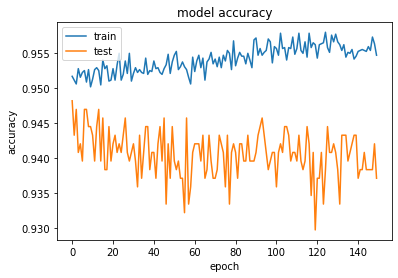

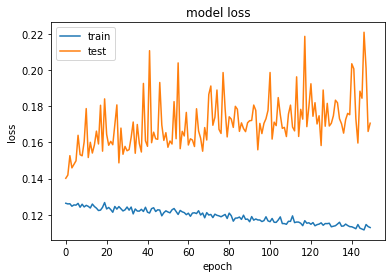

In [18]:
history = model.fit(X_train, y_train, validation_split=0.10, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
'''
NOTE:
processed dataframe to use is called normalized_df

above i mentioned that we're going to split train/test split by first splitting into 80%/20%
then using kfold with k=20 on the training set, and keeping the testing set saved for later.
this has not been done yet, we still need to create training and testing set.

ALSO i discussed above what metrics we are using to evaluate our algorithm's performance. We are using mainly recall 
but also calculating the F1 score,
just making sure we know to eventually implement it to keep our project consistent. also plan on a confusion matrix

finally, i also discussed what groups of features we want to combine into cross-product features.
those features have not yet been crossed so we need to check that we do that too before doing the network,
I just thought it would be best in the modeling section because the preparation section said to describe all of
those extra things but not necessarily to implement them yet
'''


# REQUIREMENTS:
# [2 points] 
    # Create at least three combined wide and deep networks to classify your data using Keras.
    #Visualize the performance of the network on the training data and validation data in the same plot
    # versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit"
    # function to easily access this data.
# [2 points] 
    # Investigate generalization performance by altering the number of layers in the deep branch of the network.
    # Try at least two different number of layers. Use the method of cross validation and evaluation metric that you 
    # argued for at the beginning of the lab to select the number of layers that performs superiorly. 
# [1 point]
    # Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP).
    # Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). 

"\nNOTE:\nprocessed dataframe to use is called normalized_df\n\nabove i mentioned that we're going to split train/test split by first splitting into 80%/20%\nthen using kfold with k=20 on the training set, and keeping the testing set saved for later.\nthis has not been done yet, we still need to create training and testing set.\n\nALSO i discussed above what metrics we are using to evaluate our algorithm's performance. We are using mainly recall \nbut also calculating the F1 score,\njust making sure we know to eventually implement it to keep our project consistent. also plan on a confusion matrix\n\nfinally, i also discussed what groups of features we want to combine into cross-product features.\nthose features have not yet been crossed so we need to check that we do that too before doing the network,\nI just thought it would be best in the modeling section because the preparation section said to describe all of\nthose extra things but not necessarily to implement them yet\n"

## Exceptional Work

In [20]:
# REQUIREMENTS (7324): For classification tasks, compare using the receiver operating characteristic
# and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.
# Use proper statistical methods to compare the performance of different models.  